In [1]:
import pandas as pd

In [2]:
no_metro = pd.read_csv('../Data/clean-metro-sales-aux-exc.csv', low_memory = False)

In [3]:
no_metro.columns

Index(['funding_status', 'school_charter', 'school_magnet', 'school_kipp',
       'school_nlns', 'school_year_round', 'school_charter_ready_promise',
       'teacher_prefix', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 'primary_focus_subject',
       'primary_focus_area', 'resource_type', 'poverty_level', 'grade_level',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'total_donations', 'num_donors', 'eligible_double_your_impact_match',
       'eligible_almost_home_match'],
      dtype='object')

In [4]:
no_metro = no_metro[['funding_status', 'primary_focus_subject', 'primary_focus_area', 'resource_type', 'grade_level', 'total_price_excluding_optional_support', 'total_price_including_optional_support']]

In [5]:
X = no_metro.drop('funding_status', axis=1)
y = no_metro['funding_status']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [7]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#To assign KNN, we loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []

for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'k: {k}, Train/Test Score: {train_score}/{test_score}')

k: 1, Train/Test Score: 0.9410082515433615/0.6211228745138235
k: 3, Train/Test Score: 0.8015592749125936/0.652178491694632
k: 5, Train/Test Score: 0.7668974103352569/0.6677256069307348
k: 7, Train/Test Score: 0.7512800891147962/0.6774947696541653
k: 9, Train/Test Score: 0.7421685224448532/0.6835781181987952
k: 11, Train/Test Score: 0.7362770702574688/0.6874605091337985
k: 13, Train/Test Score: 0.7322402261568776/0.6910480349344978
k: 15, Train/Test Score: 0.7293606106984559/0.693449079599545
k: 17, Train/Test Score: 0.727146781991697/0.6949760597593339
k: 19, Train/Test Score: 0.7254758795639741/0.6969172552268356


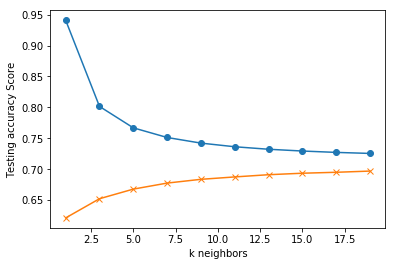

In [9]:
import matplotlib.pyplot as plt    
#You can also plot it if you want to have a look at it
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [10]:
#We predict using the value of k where train and test converge
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.697


In [11]:
#Measure model
from sklearn.metrics import mean_squared_error, r2_score

#Predict a value
predicted = knn.predict(X_test)

mse = mean_squared_error(y_test, predicted)

r2 = r2_score(y_test, predicted)
r2

-0.44142112499809283

In [12]:
mse

0.3030827447731645